In [274]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
tf.random.set_seed(7)

In [223]:
train_test = np.load("data_f1.npy",allow_pickle=True)

In [319]:
def data_func (train_test, aenv):
  
  trainX = train_test[train_test[:,30]!=aenv][:,:20]/100
  trainY = train_test[train_test[:,30]!=aenv][:,29]/100
  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX[0].shape[0]))
  trainY = np.reshape(trainY, (trainY.shape[0], 1,1))

  testX = train_test[train_test[:,30]==aenv][:,:20]/100
  testY = train_test[train_test[:,30]==aenv][:,29]/100
  testX  = np.reshape(testX , (testX.shape[0], 1, testX[0].shape[0]))
  testY = np.reshape(testY, (testY.shape[0], 1,1))

  return trainX, trainY, testX, testY


def plot_results():
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)


  plt.figure(dpi=100,figsize=(20,5))
  plt.plot(testY[:,0]*100,':ok')
  plt.plot(testPredict[:,0]*100,'-xm')
  plt.title("Aeronave: "+ str(int(aenv)))
  plt.xlabel("Dias uteis desde o dia 30")
  plt.ylabel("Desgaste")
  plt.legend(["Esperado",'Predito'])
  print()
  print("Aeronave: "+ str(int(aenv)))
  trainScore = np.sqrt(mean_squared_error(trainY[:,0], trainPredict))
  print('Train Score: %.3f RMSE' % (trainScore))
  testScore = np.sqrt(mean_squared_error(testY[:,0], testPredict))
  print('Test Score: %.3f RMSE' % (testScore))
  print()

Epoch 1/100
256/256 - 3s - loss: 0.0402 - 3s/epoch - 14ms/step
Epoch 2/100
256/256 - 1s - loss: 1.5345e-04 - 590ms/epoch - 2ms/step
Epoch 3/100
256/256 - 1s - loss: 1.1885e-04 - 535ms/epoch - 2ms/step
Epoch 4/100
256/256 - 1s - loss: 9.0357e-05 - 553ms/epoch - 2ms/step
Epoch 5/100
256/256 - 1s - loss: 6.9991e-05 - 571ms/epoch - 2ms/step
Epoch 6/100
256/256 - 1s - loss: 5.7642e-05 - 546ms/epoch - 2ms/step
Epoch 7/100
256/256 - 1s - loss: 5.1533e-05 - 553ms/epoch - 2ms/step
Epoch 8/100
256/256 - 1s - loss: 4.9272e-05 - 558ms/epoch - 2ms/step
Epoch 9/100
256/256 - 1s - loss: 4.8452e-05 - 545ms/epoch - 2ms/step
Epoch 10/100
256/256 - 1s - loss: 4.8310e-05 - 642ms/epoch - 3ms/step
Epoch 11/100
256/256 - 1s - loss: 4.8978e-05 - 549ms/epoch - 2ms/step
Epoch 12/100
256/256 - 1s - loss: 4.7965e-05 - 548ms/epoch - 2ms/step
Epoch 13/100
256/256 - 1s - loss: 4.7285e-05 - 548ms/epoch - 2ms/step
Epoch 14/100
256/256 - 1s - loss: 4.8241e-05 - 539ms/epoch - 2ms/step
Epoch 15/100
256/256 - 1s - loss: 4

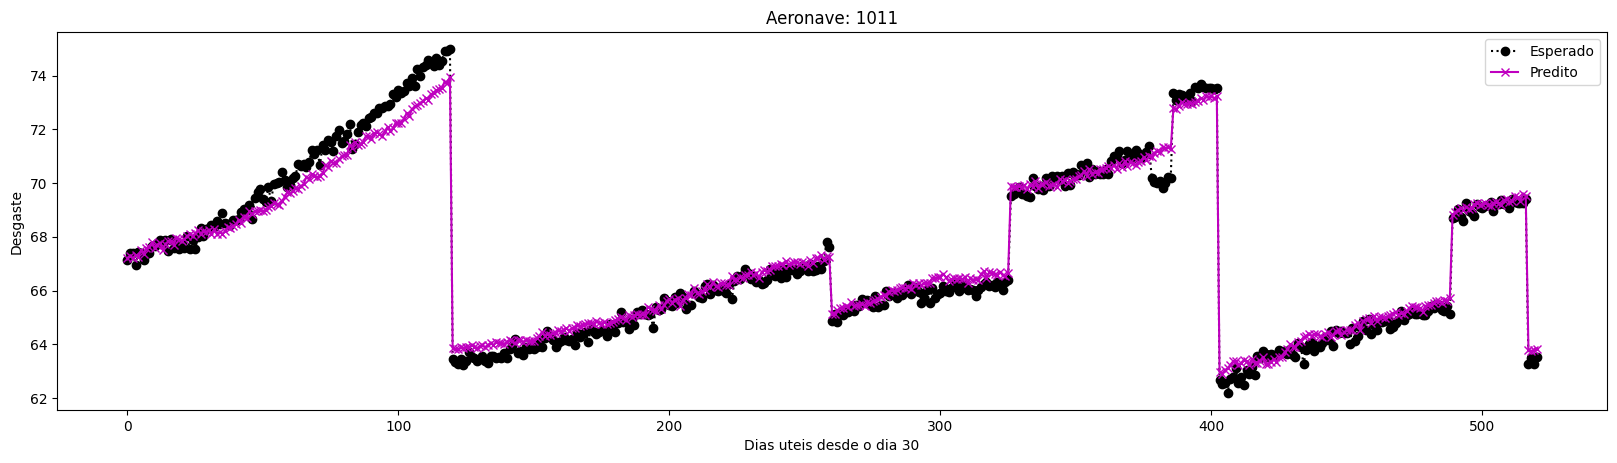

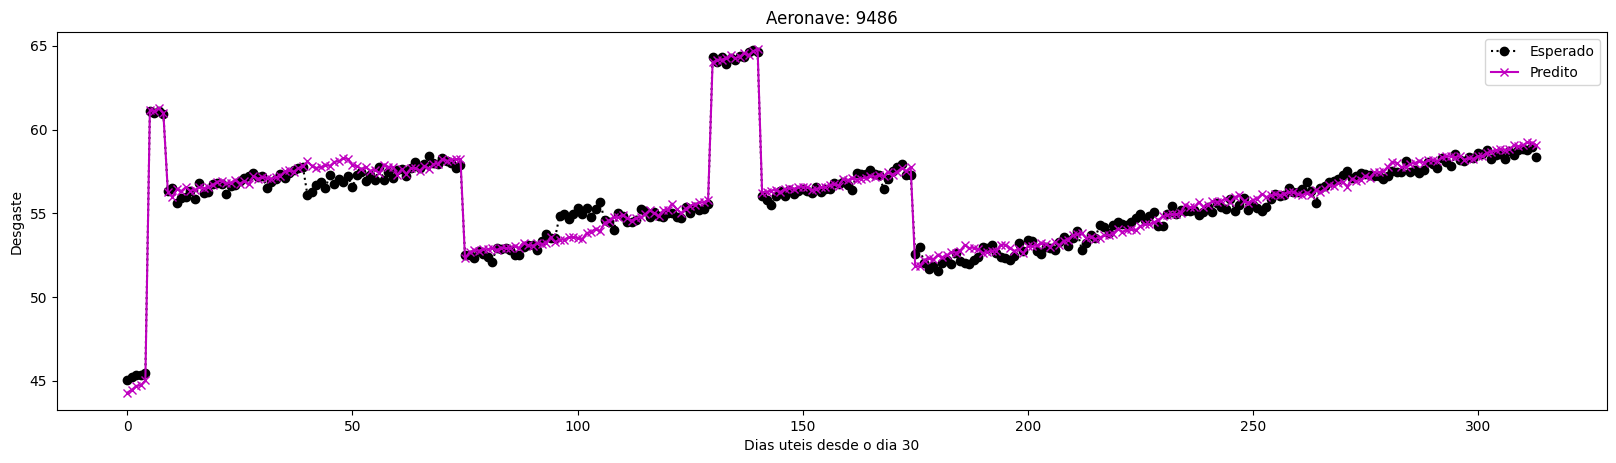

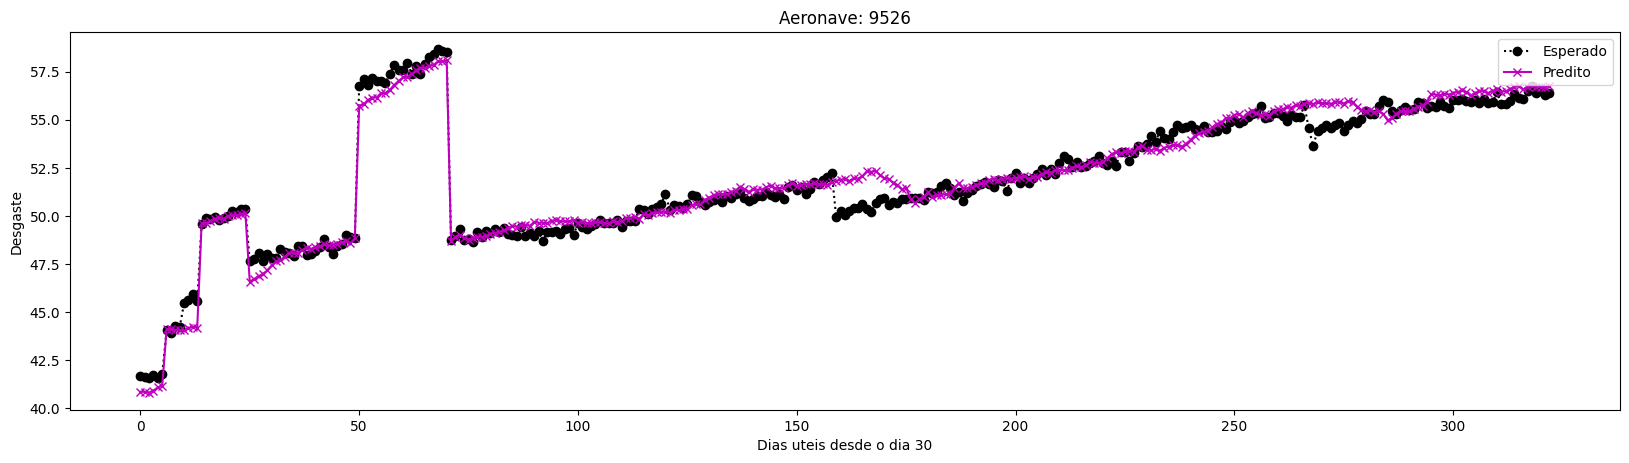

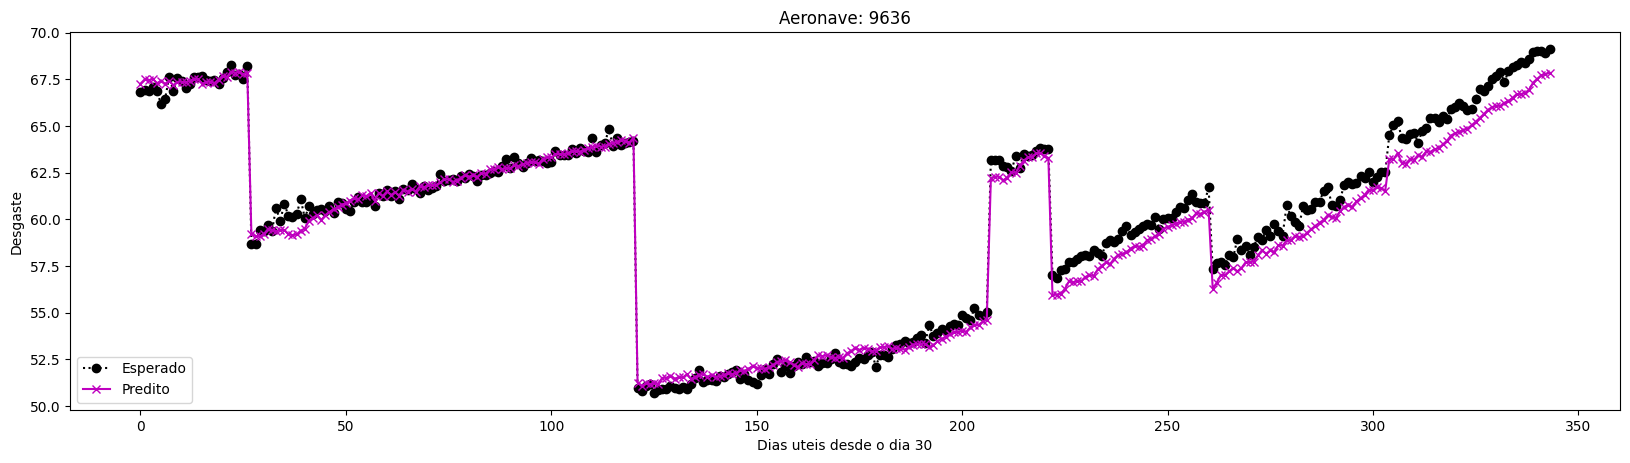

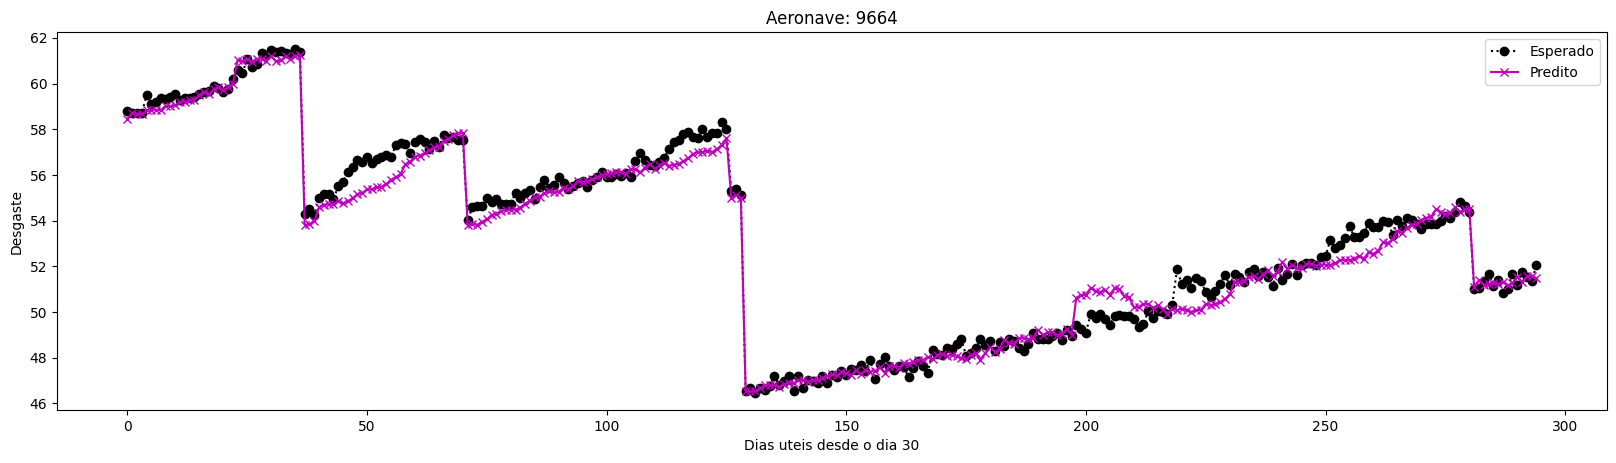

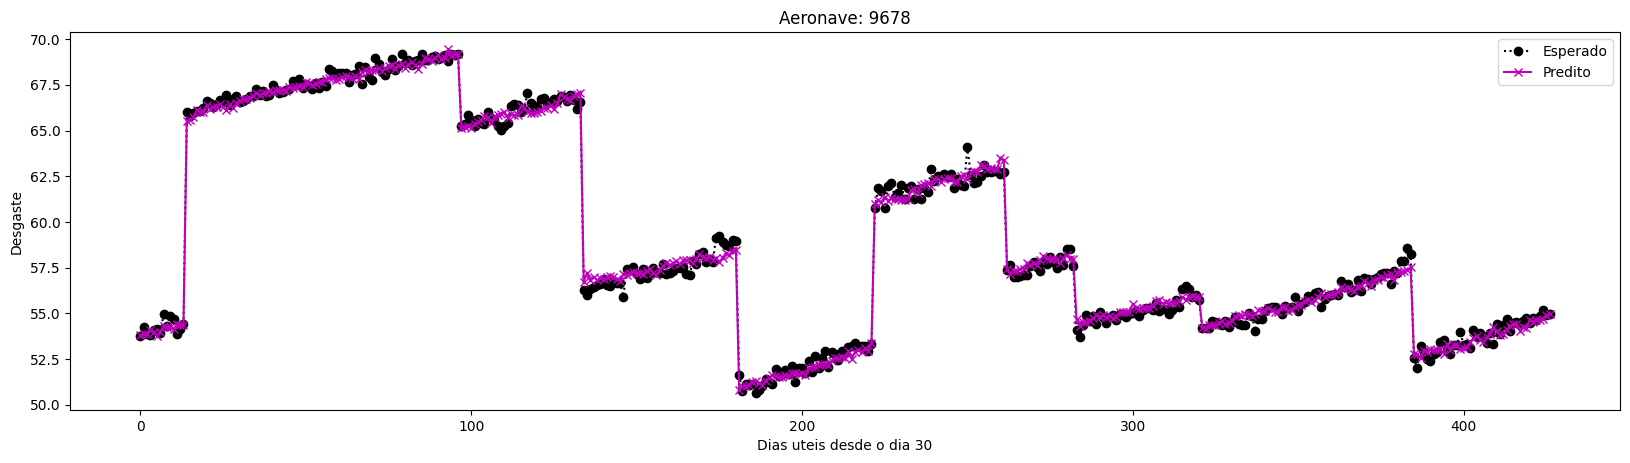

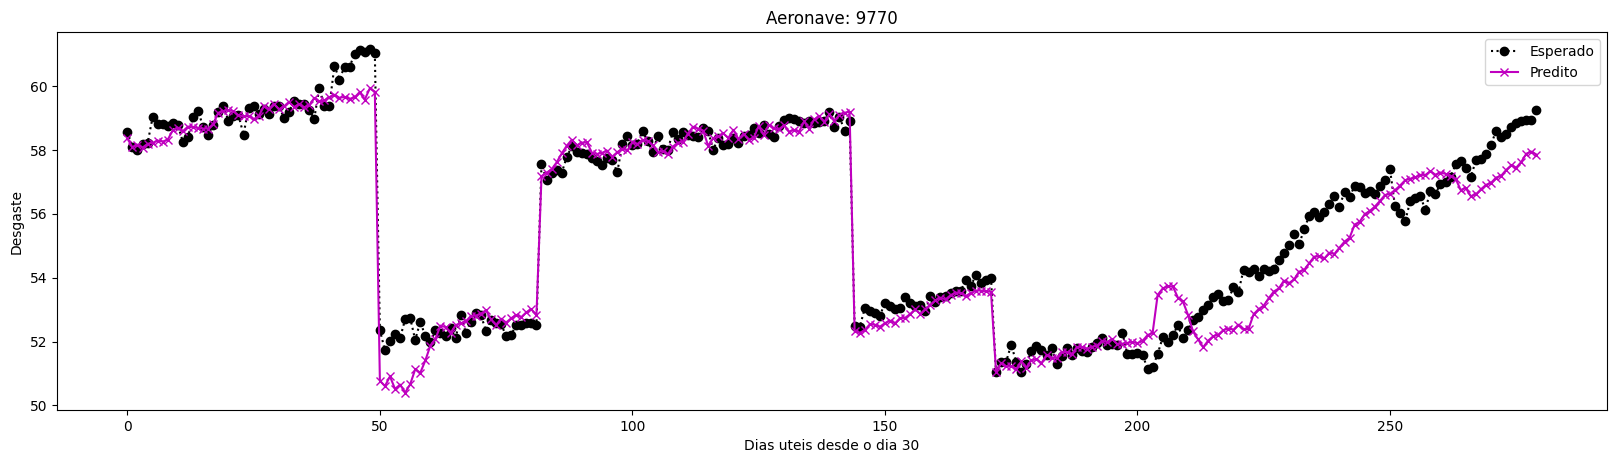

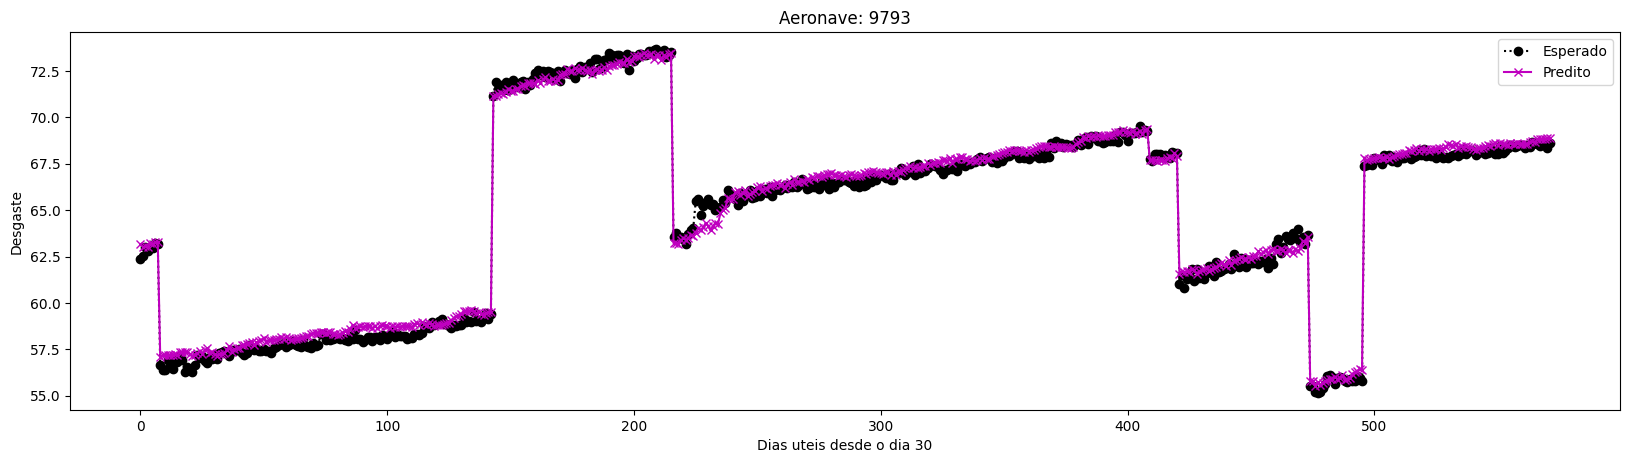

In [320]:
# create and fit the LSTM network

for k in range(0,8):
  look_back = 20
  aenv=np.unique(train_test[:,30])[k]
  trainX, trainY, testX, testY = data_func (train_test, aenv)

  model = Sequential()
  model.add(LSTM(4, input_shape=(1, look_back)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)
  plot_results()
